In [2]:
import pandas as pd
from my_utils import *
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

In [3]:
font_path = "C:/Windows/Fonts/gulim.ttc"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font) # 윈도우

In [4]:
conn = connect_mysql()
query = 'select * from lol_datas'
df = pd.DataFrame(sql_execute_dict(conn,query))
conn.close()

In [5]:
df.columns

Index(['gameId', 'gameDuration', 'gameVersion', 'summonerName',
       'summonerLevel', 'participantId', 'championName', 'champExperience',
       'teamPosition', 'teamId', 'win', 'kills', 'deaths', 'assists',
       'totalDamageDealtToChampions', 'totalDamageTaken', 'g_5', 'g_6', 'g_7',
       'g_8', 'g_9', 'g_10', 'g_11', 'g_12', 'g_13', 'g_14', 'g_15', 'g_16',
       'g_17', 'g_18', 'g_19', 'g_20', 'g_21', 'g_22', 'g_23', 'g_24', 'g_25'],
      dtype='object')

In [13]:
tmp = df[['teamPosition','totalDamageDealtToChampions','totalDamageTaken','g_15']]

In [14]:
tmp = tmp[tmp.teamPosition != '']

In [15]:
tmp

,teamPosition,totalDamageDealtToChampions,totalDamageTaken,g_15
0,TOP,11717,13003,5150
1,UTILITY,8601,10004,4575
2,MIDDLE,9277,11439,5336
3,BOTTOM,14508,7359,9438
4,JUNGLE,11772,20831,6310
...,...,...,...,...
64629,TOP,37261,25449,4300
64630,JUNGLE,46901,58628,6431
64631,MIDDLE,42942,43038,5382
64632,BOTTOM,41788,28824,5033


In [16]:
group_df = tmp.groupby('teamPosition').mean().round()

In [17]:
group_df.loc['BOTTOM']

totalDamageDealtToChampions    21536.0
totalDamageTaken               19168.0
g_15                            5953.0
Name: BOTTOM, dtype: float64

Text(0.5, 1.0, '파이차트')

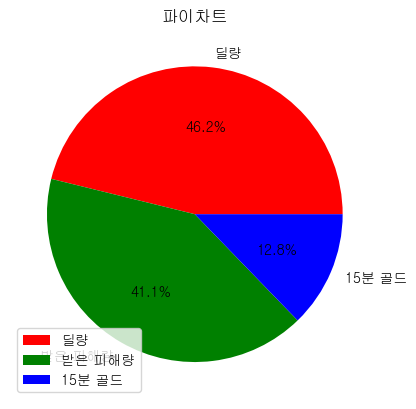

In [18]:
plt.figure()
plt.pie(group_df.loc['BOTTOM'], labels = ['딜량','받은 피해량','15분 골드'],shadow=False, autopct='%1.1f%%'
       ,explode = (0,0,0,) ,colors = ['r','g','b'])
plt.grid(True)
plt.legend(loc=3)
plt.title('파이차트')

In [19]:
my_tmp = tmp[['teamPosition','totalDamageDealtToChampions']]

In [20]:
my_tmp

,teamPosition,totalDamageDealtToChampions
0,TOP,11717
1,UTILITY,8601
2,MIDDLE,9277
3,BOTTOM,14508
4,JUNGLE,11772
...,...,...
64629,TOP,37261
64630,JUNGLE,46901
64631,MIDDLE,42942
64632,BOTTOM,41788


In [21]:
my_tmp.set_index('teamPosition',inplace=True)

In [22]:
my_tmp.in

SyntaxError: invalid syntax (2649197104.py, line 1)

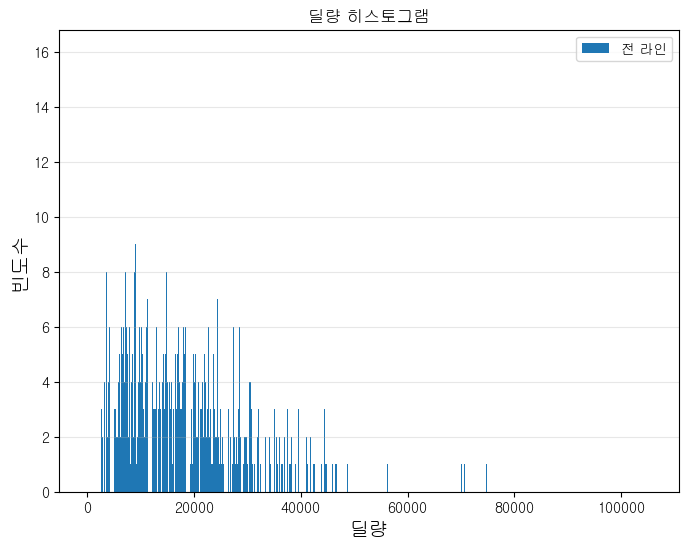

In [23]:
plt.figure(figsize=(8,6))
plt.hist(my_tmp, bins = len(my_tmp), label='전 라인',rwidth=0.9)

plt.xlabel ('딜량', size = 14)
plt.ylabel ('빈도수', size = 14)
plt.title('딜량 히스토그램')
plt.legend(loc = 'upper right')
plt.grid(axis='y' ,alpha = 0.3)

In [24]:
import seaborn as sns

In [25]:
url = 'http://openapi.seoul.go.kr:8088/(인증키)/xml/GetParkInfo/1/5/'

In [26]:
df = get_df(url)

In [27]:
df.columns

Index(['PARKING_NAME', 'ADDR', 'PARKING_CODE', 'PARKING_TYPE',
       'PARKING_TYPE_NM', 'OPERATION_RULE', 'OPERATION_RULE_NM', 'TEL',
       'QUE_STATUS', 'QUE_STATUS_NM', 'CAPACITY', 'PAY_YN', 'PAY_NM',
       'NIGHT_FREE_OPEN', 'NIGHT_FREE_OPEN_NM', 'WEEKDAY_BEGIN_TIME',
       'WEEKDAY_END_TIME', 'WEEKEND_BEGIN_TIME', 'WEEKEND_END_TIME',
       'HOLIDAY_BEGIN_TIME', 'HOLIDAY_END_TIME', 'SYNC_TIME',
       'SATURDAY_PAY_YN', 'SATURDAY_PAY_NM', 'HOLIDAY_PAY_YN',
       'HOLIDAY_PAY_NM', 'FULLTIME_MONTHLY', 'GRP_PARKNM', 'RATES',
       'TIME_RATE', 'ADD_RATES', 'ADD_TIME_RATE', 'BUS_RATES', 'BUS_TIME_RATE',
       'BUS_ADD_TIME_RATE', 'BUS_ADD_RATES', 'DAY_MAXIMUM', 'LAT', 'LNG'],
      dtype='object')

In [28]:
tmp = df[['PARKING_NAME','CAPACITY','PAY_NM','SATURDAY_PAY_NM','HOLIDAY_PAY_NM','FULLTIME_MONTHLY'
         ,'RATES','ADD_RATES']]

In [29]:
tmp

,PARKING_NAME,CAPACITY,PAY_NM,SATURDAY_PAY_NM,HOLIDAY_PAY_NM,FULLTIME_MONTHLY,RATES,ADD_RATES
0,초안산근린공원주차장(구),71.0,유료,무료,무료,0,0.0,300.0
1,마들스타디움(근린공원)(구),177.0,유료,무료,무료,100000,150.0,150.0
2,마장동(건물) 공영주차장(구),54.0,유료,무료,무료,50000,50.0,50.0
3,영등포여고 공영(구),98.0,유료,무료,무료,65000,50.0,50.0
4,당산근린공원 공영(구),190.0,유료,무료,무료,100000,150.0,150.0
...,...,...,...,...,...,...,...,...
995,낙산성곽 버스전용 주차장(구),1.0,무료,유료,유료,0,0.0,0.0
996,낙산성곽 버스전용 주차장(구),1.0,무료,유료,유료,0,0.0,0.0
997,낙산성곽 버스전용 주차장(구),1.0,무료,유료,유료,0,0.0,0.0
998,낙산성곽 버스전용 주차장(구),1.0,무료,유료,유료,0,0.0,0.0


In [30]:
tmp.columns = ['주차장명','주차수','유무료','주말유무료','공휴일유무료',
                 '월정기권금액','기본요금','추가요금']

In [31]:
tmp

,주차장명,주차수,유무료,주말유무료,공휴일유무료,월정기권금액,기본요금,추가요금
0,초안산근린공원주차장(구),71.0,유료,무료,무료,0,0.0,300.0
1,마들스타디움(근린공원)(구),177.0,유료,무료,무료,100000,150.0,150.0
2,마장동(건물) 공영주차장(구),54.0,유료,무료,무료,50000,50.0,50.0
3,영등포여고 공영(구),98.0,유료,무료,무료,65000,50.0,50.0
4,당산근린공원 공영(구),190.0,유료,무료,무료,100000,150.0,150.0
...,...,...,...,...,...,...,...,...
995,낙산성곽 버스전용 주차장(구),1.0,무료,유료,유료,0,0.0,0.0
996,낙산성곽 버스전용 주차장(구),1.0,무료,유료,유료,0,0.0,0.0
997,낙산성곽 버스전용 주차장(구),1.0,무료,유료,유료,0,0.0,0.0
998,낙산성곽 버스전용 주차장(구),1.0,무료,유료,유료,0,0.0,0.0


<Axes: title={'center': '주차장 유무료'}, xlabel='유무료', ylabel='count'>

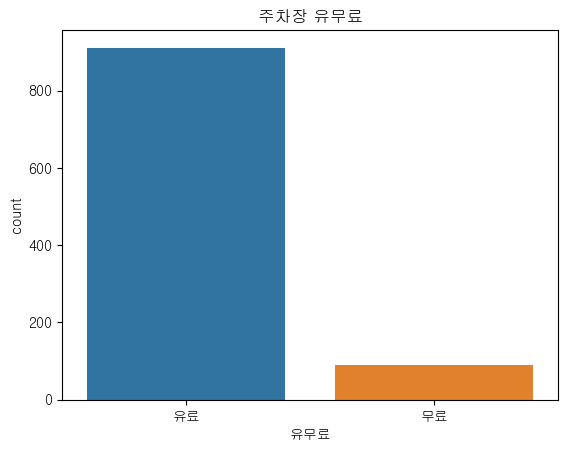

In [32]:
plt.figure()
plt.title('주차장 유무료')
sns.countplot(x = '유무료' ,data = tmp, order=["유료",'무료'])

<Axes: title={'center': '기본요금 히스토그램'}, xlabel='기본요금', ylabel='Count'>

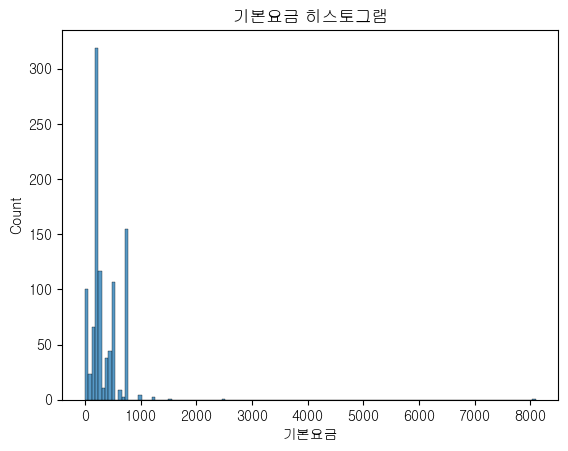

In [33]:
plt.figure()
plt.title('기본요금 히스토그램')
sns.histplot(x= tmp['기본요금'])

<Axes: xlabel='기본요금', ylabel='추가요금'>

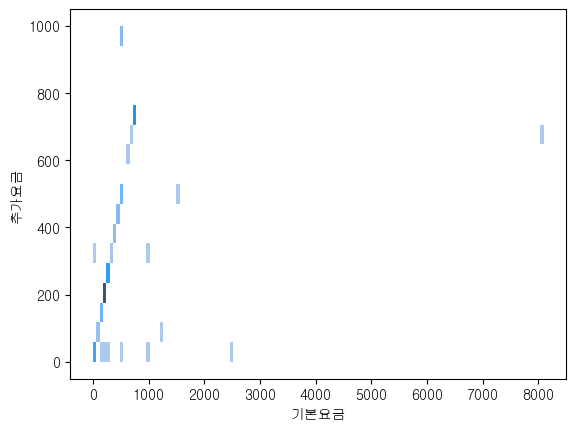

In [34]:
sns.histplot(x=tmp['기본요금'], y=tmp['추가요금'])

<Axes: xlabel='기본요금', ylabel='Density'>

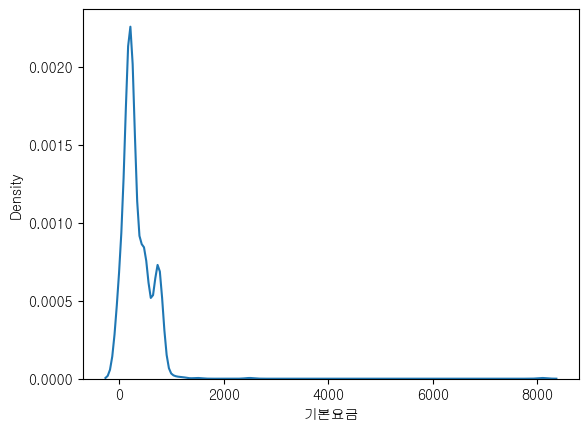

In [35]:
plt.figure()
sns.kdeplot(x=tmp['기본요금'])

In [36]:
conn = connect_mysql()
query = 'select * from lol_datas'
lol_df = pd.DataFrame(sql_execute_dict(conn,query))

In [37]:
lol_df.columns

Index(['gameId', 'gameDuration', 'gameVersion', 'summonerName',
       'summonerLevel', 'participantId', 'championName', 'champExperience',
       'teamPosition', 'teamId', 'win', 'kills', 'deaths', 'assists',
       'totalDamageDealtToChampions', 'totalDamageTaken', 'g_5', 'g_6', 'g_7',
       'g_8', 'g_9', 'g_10', 'g_11', 'g_12', 'g_13', 'g_14', 'g_15', 'g_16',
       'g_17', 'g_18', 'g_19', 'g_20', 'g_21', 'g_22', 'g_23', 'g_24', 'g_25'],
      dtype='object')

In [38]:
lol_tmp = lol_df[['teamPosition','g_15','g_20']]

In [40]:
lol_tmp = lol_tmp[lol_tmp.teamPosition == 'JUNGLE']

In [41]:
lol_tmp.columns = '포지션','15분 골드', '20분 골드'

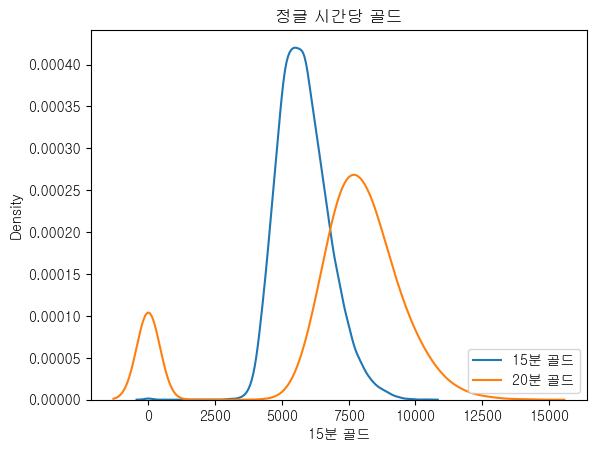

In [42]:
plt.figure()
plt.title('정글 시간당 골드')
sns.kdeplot(x=lol_tmp['15분 골드'], label = '15분 골드')
sns.kdeplot(x=lol_tmp['20분 골드'], label = '20분 골드')
plt.legend(loc=4)

<Axes: title={'center': '정글 시간당 골드'}, xlabel='20분 골드', ylabel='Density'>

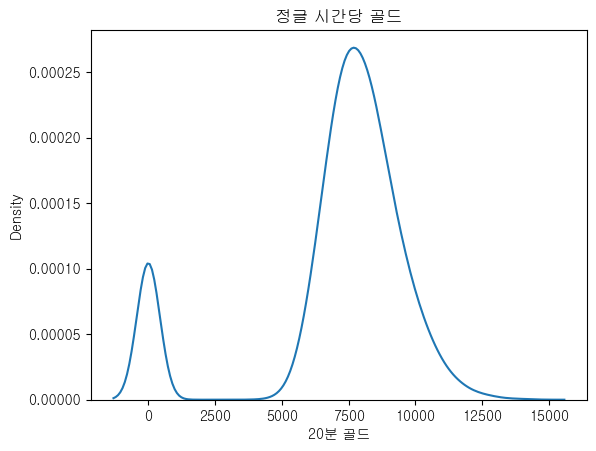

In [43]:
plt.figure()
plt.title('정글 시간당 골드')
sns.kdeplot(x=lol_tmp['20분 골드'])

In [44]:
import seaborn as sns

In [45]:
url = 'http://openapi.seoul.go.kr:8088/(인증키)/xml/GetParkInfo/1/5/'

In [46]:
df = get_df(url)

In [47]:
df.columns

Index(['PARKING_NAME', 'ADDR', 'PARKING_CODE', 'PARKING_TYPE',
       'PARKING_TYPE_NM', 'OPERATION_RULE', 'OPERATION_RULE_NM', 'TEL',
       'QUE_STATUS', 'QUE_STATUS_NM', 'CAPACITY', 'PAY_YN', 'PAY_NM',
       'NIGHT_FREE_OPEN', 'NIGHT_FREE_OPEN_NM', 'WEEKDAY_BEGIN_TIME',
       'WEEKDAY_END_TIME', 'WEEKEND_BEGIN_TIME', 'WEEKEND_END_TIME',
       'HOLIDAY_BEGIN_TIME', 'HOLIDAY_END_TIME', 'SYNC_TIME',
       'SATURDAY_PAY_YN', 'SATURDAY_PAY_NM', 'HOLIDAY_PAY_YN',
       'HOLIDAY_PAY_NM', 'FULLTIME_MONTHLY', 'GRP_PARKNM', 'RATES',
       'TIME_RATE', 'ADD_RATES', 'ADD_TIME_RATE', 'BUS_RATES', 'BUS_TIME_RATE',
       'BUS_ADD_TIME_RATE', 'BUS_ADD_RATES', 'DAY_MAXIMUM', 'LAT', 'LNG'],
      dtype='object')

In [48]:
tmp = df[['PARKING_NAME','CAPACITY','PAY_NM','SATURDAY_PAY_NM','HOLIDAY_PAY_NM','FULLTIME_MONTHLY'
         ,'RATES','ADD_RATES']]

In [49]:
tmp

,PARKING_NAME,CAPACITY,PAY_NM,SATURDAY_PAY_NM,HOLIDAY_PAY_NM,FULLTIME_MONTHLY,RATES,ADD_RATES
0,초안산근린공원주차장(구),71.0,유료,무료,무료,0,0.0,300.0
1,마들스타디움(근린공원)(구),177.0,유료,무료,무료,100000,150.0,150.0
2,마장동(건물) 공영주차장(구),54.0,유료,무료,무료,50000,50.0,50.0
3,영등포여고 공영(구),98.0,유료,무료,무료,65000,50.0,50.0
4,당산근린공원 공영(구),190.0,유료,무료,무료,100000,150.0,150.0
...,...,...,...,...,...,...,...,...
995,낙산성곽 버스전용 주차장(구),1.0,무료,유료,유료,0,0.0,0.0
996,낙산성곽 버스전용 주차장(구),1.0,무료,유료,유료,0,0.0,0.0
997,낙산성곽 버스전용 주차장(구),1.0,무료,유료,유료,0,0.0,0.0
998,낙산성곽 버스전용 주차장(구),1.0,무료,유료,유료,0,0.0,0.0


In [50]:
tmp.columns = ['주차장명','주차수','유무료','주말유무료','공휴일유무료',
                 '월정기권금액','기본요금','추가요금']

C:\Users\thdxo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


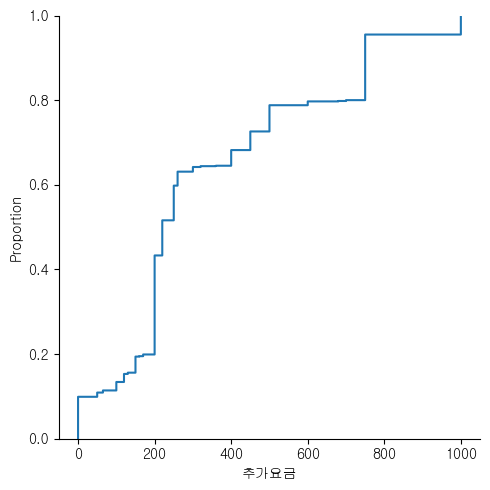

In [51]:
sns.displot(x= tmp['추가요금'], kind = 'ecdf')

<Axes: xlabel='기본요금', ylabel='Density'>

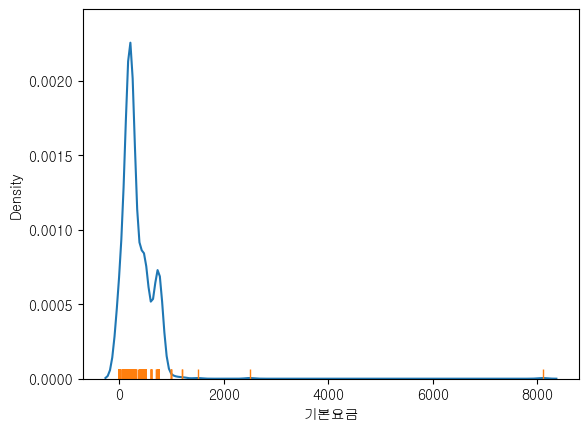

In [52]:
sns.kdeplot(x=tmp['기본요금'])
sns.rugplot(x=tmp['기본요금'])

<Axes: xlabel='주말유무료', ylabel='기본요금'>

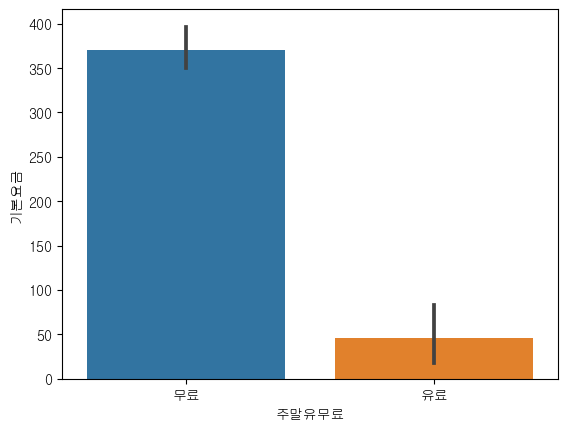

In [53]:
sns.barplot(x=tmp['주말유무료'],y=tmp['기본요금'])

<Axes: xlabel='주말유무료', ylabel='count'>

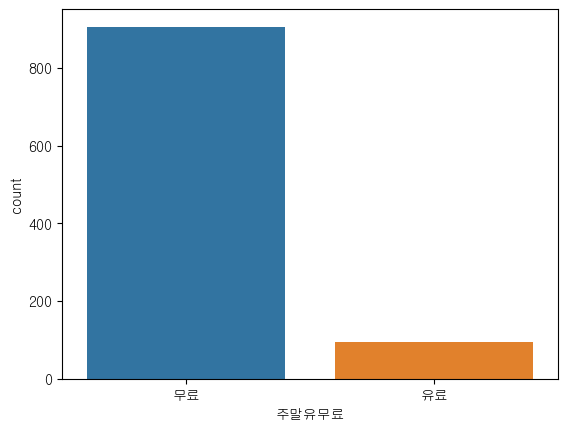

In [54]:
sns.countplot(x=tmp['주말유무료'])

<Axes: xlabel='주말유무료', ylabel='기본요금'>

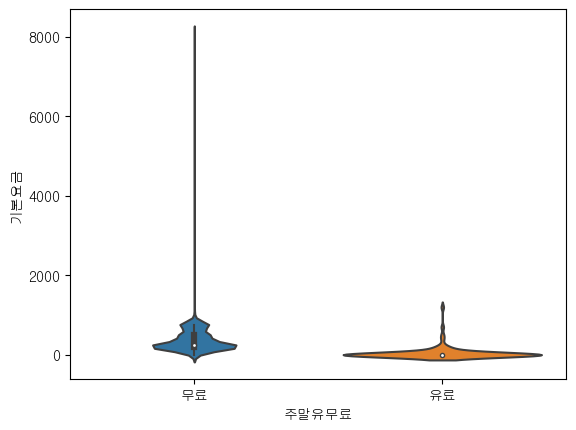

In [55]:
sns.violinplot(x=tmp['주말유무료'], y=tmp['기본요금'])

<Axes: xlabel='주말유무료', ylabel='기본요금'>

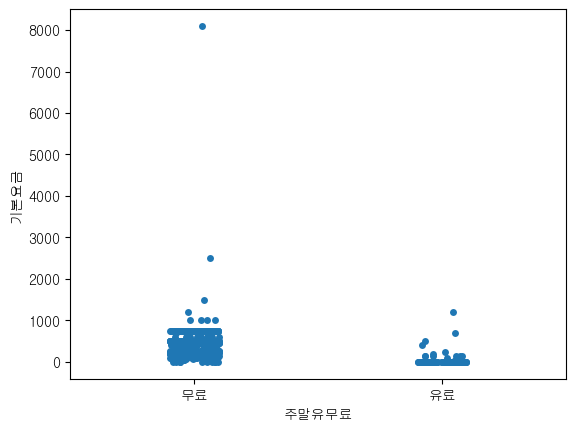

In [56]:
sns.stripplot(x = tmp['주말유무료'] , y = tmp['기본요금'])

In [57]:
tmp.set_index('주차장명',inplace=True)

In [58]:
test = tmp[['주차수','기본요금','추가요금']]

<Axes: >

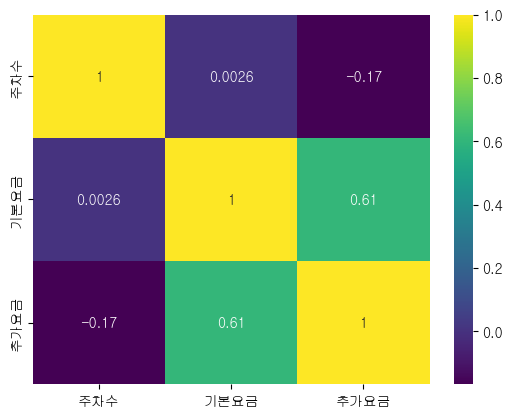

In [59]:
sns.heatmap(test.corr(), annot=True,cmap='viridis')

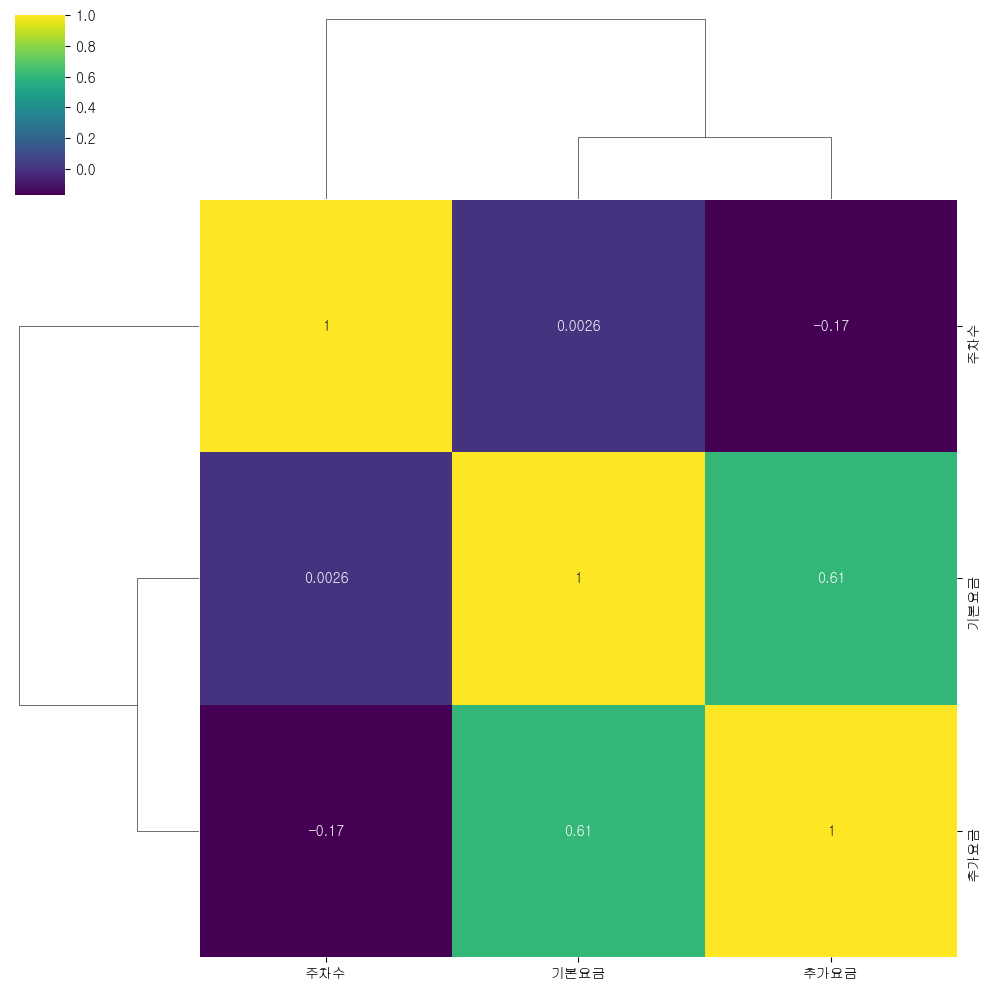

In [60]:
sns.clustermap(test.corr(), annot=True,cmap='viridis')

C:\Users\thdxo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


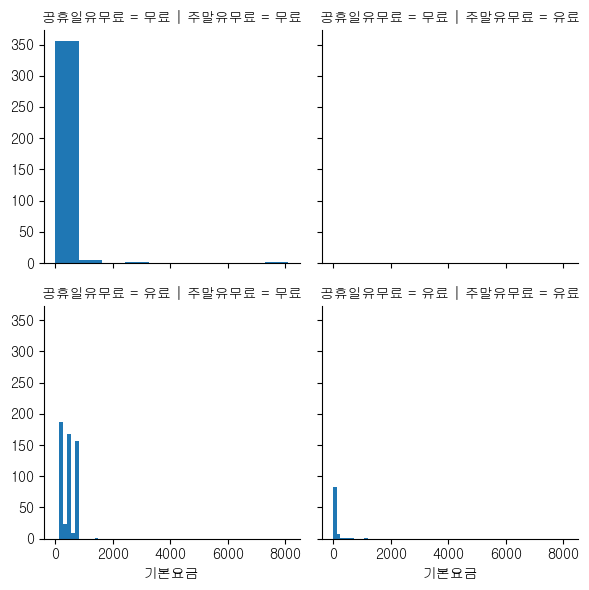

In [61]:
sns.FacetGrid(tmp,col='주말유무료',row='공휴일유무료').map(plt.hist,'기본요금')

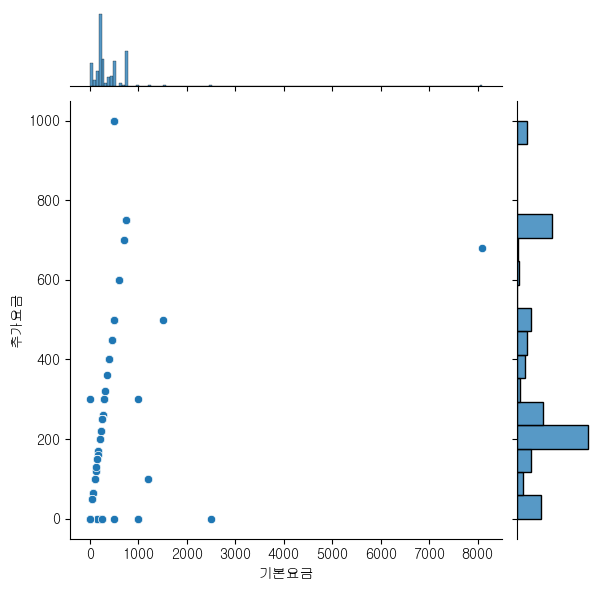

In [62]:
sns.jointplot(x=tmp['기본요금'],y=tmp['추가요금'],kind = 'scatter')

<Axes: xlabel='기본요금', ylabel='추가요금'>

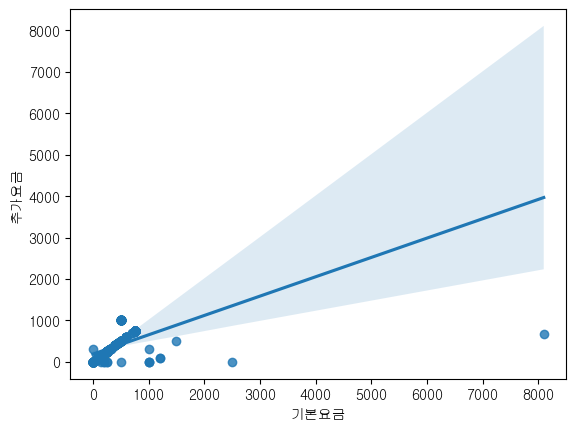

In [63]:
sns.regplot(x='기본요금',y='추가요금',data = tmp)

C:\Users\thdxo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


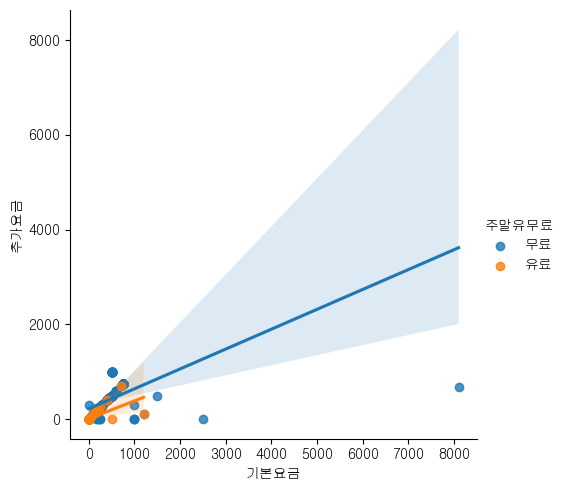

In [64]:
sns.lmplot(x='기본요금',y='추가요금',data = tmp, hue = '주말유무료')

C:\Users\thdxo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


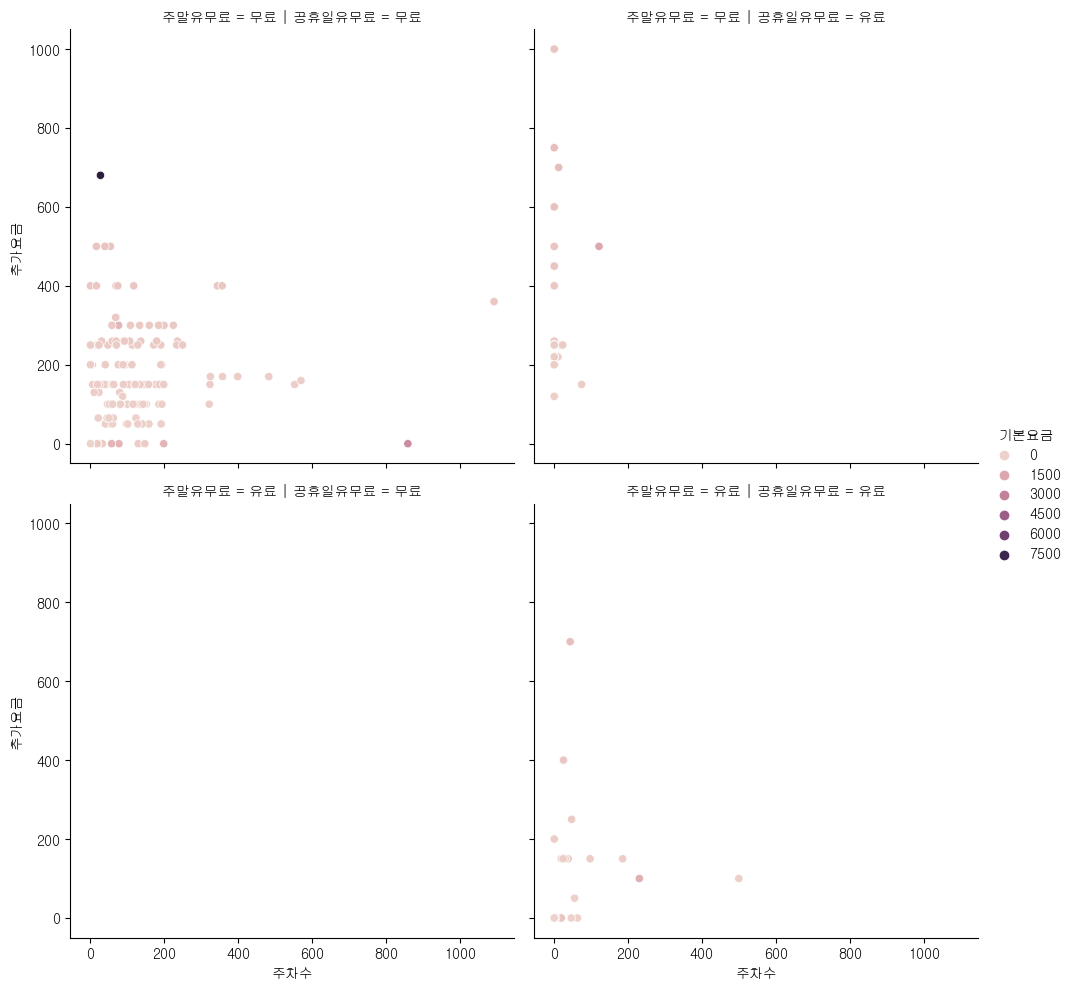

In [65]:
sns.relplot(x='주차수',y='추가요금',hue = '기본요금',row='주말유무료',col='공휴일유무료',data=tmp)

In [66]:
import plotly
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True)

In [67]:
url = "https://api.upbit.com/v1/candles/days"
coin_lst = ['KRW-BTC','KRW-ETH','KRW-XRP']
headers = {"Accept": "application/json"}
df = pd.DataFrame()
for c in coin_lst:
    querystring = {"market":c, "count":"200"}
    response = requests.request("GET", url, headers=headers, params=querystring)
    df = pd.concat([df,pd.DataFrame(response.json())])

In [68]:
df

,market,candle_date_time_utc,candle_date_time_kst,opening_price,high_price,low_price,trade_price,timestamp,candle_acc_trade_price,candle_acc_trade_volume,prev_closing_price,change_price,change_rate
0,KRW-BTC,2023-12-29T00:00:00,2023-12-29T09:00:00,56904000.0,57095000.0,56447000.0,56661000.0,1703812209216,2.125216e+10,3.743770e+02,56907000.0,-246000.0,-0.004323
1,KRW-BTC,2023-12-28T00:00:00,2023-12-28T09:00:00,57920000.0,58468000.0,56700000.0,56907000.0,1703807999951,2.269573e+11,3.958817e+03,57920000.0,-1013000.0,-0.017490
2,KRW-BTC,2023-12-27T00:00:00,2023-12-27T09:00:00,57032000.0,58212000.0,56349000.0,57920000.0,1703721598803,2.270096e+11,3.965843e+03,57032000.0,888000.0,0.015570
3,KRW-BTC,2023-12-26T00:00:00,2023-12-26T09:00:00,58042000.0,58140000.0,56349000.0,57032000.0,1703635199803,2.708228e+11,4.735230e+03,58042000.0,-1010000.0,-0.017401
4,KRW-BTC,2023-12-25T00:00:00,2023-12-25T09:00:00,58002000.0,58659000.0,57464000.0,58042000.0,1703548799890,2.721330e+11,4.687209e+03,58002000.0,40000.0,0.000690
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,KRW-XRP,2023-06-17T00:00:00,2023-06-17T09:00:00,624.0,637.0,615.0,629.0,1687046399585,9.285423e+10,1.480452e+08,624.0,5.0,0.008013
196,KRW-XRP,2023-06-16T00:00:00,2023-06-16T09:00:00,627.0,630.0,602.0,624.0,1686959997094,1.610391e+11,2.616515e+08,627.0,-3.0,-0.004785
197,KRW-XRP,2023-06-15T00:00:00,2023-06-15T09:00:00,630.0,638.0,612.0,627.0,1686873599460,1.663204e+11,2.660830e+08,631.0,-4.0,-0.006339
198,KRW-XRP,2023-06-14T00:00:00,2023-06-14T09:00:00,678.0,681.0,609.0,631.0,1686787200001,2.592919e+11,3.998507e+08,679.0,-48.0,-0.070692


In [69]:
my_df = df[['market','candle_date_time_kst','opening_price','high_price',
            'low_price','trade_price','candle_acc_trade_price','candle_acc_trade_volume']].copy()
my_df

,market,candle_date_time_kst,opening_price,high_price,low_price,trade_price,candle_acc_trade_price,candle_acc_trade_volume
0,KRW-BTC,2023-12-29T09:00:00,56904000.0,57095000.0,56447000.0,56661000.0,2.125216e+10,3.743770e+02
1,KRW-BTC,2023-12-28T09:00:00,57920000.0,58468000.0,56700000.0,56907000.0,2.269573e+11,3.958817e+03
2,KRW-BTC,2023-12-27T09:00:00,57032000.0,58212000.0,56349000.0,57920000.0,2.270096e+11,3.965843e+03
3,KRW-BTC,2023-12-26T09:00:00,58042000.0,58140000.0,56349000.0,57032000.0,2.708228e+11,4.735230e+03
4,KRW-BTC,2023-12-25T09:00:00,58002000.0,58659000.0,57464000.0,58042000.0,2.721330e+11,4.687209e+03
...,...,...,...,...,...,...,...,...
195,KRW-XRP,2023-06-17T09:00:00,624.0,637.0,615.0,629.0,9.285423e+10,1.480452e+08
196,KRW-XRP,2023-06-16T09:00:00,627.0,630.0,602.0,624.0,1.610391e+11,2.616515e+08
197,KRW-XRP,2023-06-15T09:00:00,630.0,638.0,612.0,627.0,1.663204e+11,2.660830e+08
198,KRW-XRP,2023-06-14T09:00:00,678.0,681.0,609.0,631.0,2.592919e+11,3.998507e+08


# 첫번째 전처리 - market에서 코인의 이름만 남기기
# 두번째 전처리 - candle_date_time_kst 날짜만 남기기

- blue팀 정글포지션인 사람들만 꺼내서 [GAMEID,CHAMPIONNAME,WIN].RENAME(CHAMPIONID -> j_champ) (테이블 이름 - blue_jungle)
- blue팀 탑포지션인 사람들만 꺼내서 [GAMEID,CHAMPIONNAME,WIN].RENAME(CHAMPIONID -> t_champ) (테이블 이름 - blue_top)
- blue팀끼리 merge 

- red 동일하게 정글, 탑 뽑아내서 merge


- blue팀과 red팀의 데이터를 merge하기 위해서 enemy_blue / enemy_red 라는 데이터프레임 제작 
- 이후 championName들을 rename을 통해 각각 enemy_j_champ_cham enemy_t_champ으로 변환


- blue팀입장에서 red팀의 데이터 merge
- red 팀 입장에서 blue팀 데이터 merge

- 위에서 만들어진 merge테이블을 concat을 이용해서 하나의 데이터 테이블로 만들기
- games와 win의 횟수를 구하고 win_rate(승률) 컬럼을 추가한 result 테이블 

In [70]:
lol_df

,gameId,gameDuration,gameVersion,summonerName,summonerLevel,participantId,championName,champExperience,teamPosition,teamId,...,g_16,g_17,g_18,g_19,g_20,g_21,g_22,g_23,g_24,g_25
0,KR_6606773837,1105,13.14.520.6878,광년 일라오이,282,1,Shyvana,10434,TOP,100,...,6023,6501,8217,8471,0,0,0,0,0,0
1,KR_6606773837,1105,13.14.520.6878,아아에 얼음많이,41,2,Gragas,6226,UTILITY,100,...,4985,5366,6131,6338,0,0,0,0,0,0
2,KR_6606773837,1105,13.14.520.6878,킬각 Artist,191,3,Yone,9309,MIDDLE,100,...,6264,6711,7224,7805,0,0,0,0,0,0
3,KR_6606773837,1105,13.14.520.6878,mkim437,169,4,Varus,9336,BOTTOM,100,...,9960,10406,11095,11576,0,0,0,0,0,0
4,KR_6606773837,1105,13.14.520.6878,2024년7월8일,314,5,Sylas,9063,JUNGLE,100,...,6717,6918,7810,8164,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64637,KR_6871754477,1047,13.24.547.9214,dlawlstn1,78,4,Darius,12500,,200,...,12750,12750,12750,0,0,0,0,0,0,0
64638,KR_6871754477,1047,13.24.547.9214,범지야 잘 좀 해,70,5,Vayne,17000,,100,...,19800,20150,20500,0,0,0,0,0,0,0
64639,KR_6871754477,1047,13.24.547.9214,평콩이,419,6,Trundle,17000,,100,...,19800,20150,20500,0,0,0,0,0,0,0
64640,KR_6871754477,1047,13.24.547.9214,아칼리에이를갈음,38,7,Akali,17000,,100,...,19450,19800,19800,0,0,0,0,0,0,0


In [78]:
blue_team1 = lol_df[lol_df.teamId == 100]
blue_team2 = lol_df[lol_df.teamId == 100]

In [84]:
red_team1 = lol_df[lol_df.teamId == 200]
red_team2 = lol_df[lol_df.teamId == 200]

In [79]:
blue_team1 = blue_team1[blue_team1.teamPosition == 'TOP']
blue_team2 = blue_team2[blue_team2.teamPosition == 'JUNGLE']

In [85]:
red_team1 = red_team1[red_team1.teamPosition == 'TOP']
red_team2 = red_team2[red_team2.teamPosition == 'JUNGLE']

In [87]:
red_team2.columns

Index(['gameId', 'gameDuration', 'gameVersion', 'summonerName',
       'summonerLevel', 'participantId', 'championName', 'champExperience',
       'teamPosition', 'teamId', 'win', 'kills', 'deaths', 'assists',
       'totalDamageDealtToChampions', 'totalDamageTaken', 'g_5', 'g_6', 'g_7',
       'g_8', 'g_9', 'g_10', 'g_11', 'g_12', 'g_13', 'g_14', 'g_15', 'g_16',
       'g_17', 'g_18', 'g_19', 'g_20', 'g_21', 'g_22', 'g_23', 'g_24', 'g_25'],
      dtype='object')

In [73]:
blue_team2.columns

Index(['gameId', 'gameDuration', 'gameVersion', 'summonerName',
       'summonerLevel', 'participantId', 'championName', 'champExperience',
       'teamPosition', 'teamId', 'win', 'kills', 'deaths', 'assists',
       'totalDamageDealtToChampions', 'totalDamageTaken', 'g_5', 'g_6', 'g_7',
       'g_8', 'g_9', 'g_10', 'g_11', 'g_12', 'g_13', 'g_14', 'g_15', 'g_16',
       'g_17', 'g_18', 'g_19', 'g_20', 'g_21', 'g_22', 'g_23', 'g_24', 'g_25'],
      dtype='object')

In [103]:
blue_top = blue_team1[['gameId','championName','win']]
blue_jungle = blue_team2[['gameId','championName','win']]

In [104]:
red_top = red_team1[['gameId','championName','win']]
red_jungle = red_team2[['gameId','championName','win']]

In [110]:
blue_top.columns = 'gameId','t_champ','win'
blue_jungle.columns ='gameId','j_champ','win'

In [105]:
red_top.columns = 'gameId','t_champ','win'
red_jungle.columns ='gameId','j_champ','win'

In [106]:
red_top

,gameId,t_champ,win
5,KR_6606773837,Aatrox,False
15,KR_6606820276,Renekton,True
25,KR_6606823701,Illaoi,False
35,KR_6606877275,Irelia,False
45,KR_6606923700,Varus,True
...,...,...,...
64589,KR_6871722335,Garen,True
64599,KR_6871725629,Pantheon,True
64609,KR_6871728109,Nasus,True
64619,KR_6871734464,Nasus,False


In [118]:
blue_jungle

,gameId,j_champ,win
4,KR_6606773837,Sylas,True
11,KR_6606820276,Nidalee,False
21,KR_6606823701,Evelynn,True
31,KR_6606877275,Zac,True
40,KR_6606923700,LeeSin,False
...,...,...,...
64585,KR_6871722335,Karthus,False
64595,KR_6871725629,LeeSin,False
64605,KR_6871728109,Sejuani,False
64615,KR_6871734464,Vi,True


In [132]:
blue_df = pd.merge(blue_top,blue_jungle,on=['gameId','win'])
red_df = pd.merge(red_top,red_jungle, on = ['gameId','win'])

In [138]:
red_df

,gameId,t_champ,win,j_champ
0,KR_6606773837,Aatrox,False,LeeSin
1,KR_6606820276,Renekton,True,Graves
2,KR_6606823701,Illaoi,False,Hecarim
3,KR_6606877275,Irelia,False,Diana
4,KR_6606923700,Varus,True,Sejuani
...,...,...,...,...
5912,KR_6871722335,Garen,True,LeeSin
5913,KR_6871725629,Pantheon,True,Lillia
5914,KR_6871728109,Nasus,True,Shaco
5915,KR_6871734464,Nasus,False,Nocturne


In [142]:
blue_df

,gameId,t_champ,win,j_champ
0,KR_6606773837,Shyvana,True,Sylas
1,KR_6606820276,Gnar,False,Nidalee
2,KR_6606823701,KSante,True,Evelynn
3,KR_6606877275,Darius,True,Zac
4,KR_6606923700,Yone,False,LeeSin
...,...,...,...,...
5912,KR_6871722335,Qiyana,False,Karthus
5913,KR_6871725629,Aatrox,False,LeeSin
5914,KR_6871728109,Renekton,False,Sejuani
5915,KR_6871734464,Qiyana,True,Vi


In [139]:
enemy_blue_df = blue_df.copy()

In [140]:
enemy_red_df = red_df.copy()

In [141]:
enemy_blue_df.columns = 'gameId','enemy_t_champ','win','enemy_j_champ'
enemy_red_df.columns = 'gameId','enemy_t_champ','win','enemy_j_champ'

In [149]:
team_blue = pd.merge(blue_df,enemy_red_df, on=['gameId'])
team_red = pd.merge(red_df,enemy_blue_df, on=['gameId'])

In [155]:
team_red

,gameId,t_champ,win,j_champ,enemy_t_champ,enemy_j_champ
0,KR_6606773837,Aatrox,False,LeeSin,Shyvana,Sylas
1,KR_6606820276,Renekton,True,Graves,Gnar,Nidalee
2,KR_6606823701,Illaoi,False,Hecarim,KSante,Evelynn
3,KR_6606877275,Irelia,False,Diana,Darius,Zac
4,KR_6606923700,Varus,True,Sejuani,Yone,LeeSin
...,...,...,...,...,...,...
5912,KR_6871722335,Garen,True,LeeSin,Qiyana,Karthus
5913,KR_6871725629,Pantheon,True,Lillia,Aatrox,LeeSin
5914,KR_6871728109,Nasus,True,Shaco,Renekton,Sejuani
5915,KR_6871734464,Nasus,False,Nocturne,Qiyana,Vi


In [152]:
team_red = team_red.rename(columns={'win_x':'win'})
team_blue = team_blue.rename(columns={'win_x':'win'})

In [154]:
team_blue = team_blue.drop(columns='win_y',axis=1)
team_red = team_red.drop(columns='win_y',axis=1)

In [156]:
tmp = pd.concat([team_red,team_blue])

In [159]:
tmp

,gameId,t_champ,win,j_champ,enemy_t_champ,enemy_j_champ
0,KR_6606773837,Aatrox,0,LeeSin,Shyvana,Sylas
1,KR_6606820276,Renekton,1,Graves,Gnar,Nidalee
2,KR_6606823701,Illaoi,0,Hecarim,KSante,Evelynn
3,KR_6606877275,Irelia,0,Diana,Darius,Zac
4,KR_6606923700,Varus,1,Sejuani,Yone,LeeSin
...,...,...,...,...,...,...
5912,KR_6871722335,Qiyana,0,Karthus,Garen,LeeSin
5913,KR_6871725629,Aatrox,0,LeeSin,Pantheon,Lillia
5914,KR_6871728109,Renekton,0,Sejuani,Nasus,Shaco
5915,KR_6871734464,Qiyana,1,Vi,Nasus,Nocturne


In [158]:
tmp['win'] = tmp.apply(lambda x :1 if x.win == 'True' else 0,axis=1)

In [ ]:
games와 win의 횟수를 구하고 win_rate(승률) 컬럼을 추가한 result 테이블

In [160]:
games = tmp[['t_champ','j_champ','enemy_t_champ','enemy_j_champ','win']].groupby(['t_champ','j_champ','enemy_t_champ','enemy_j_champ']).count().rename(columns={'win':'cnt'})

In [161]:
win = tmp[['t_champ','j_champ','enemy_t_champ','enemy_j_champ','win']].groupby(['t_champ','j_champ','enemy_t_champ','enemy_j_champ']).sum().rename(columns={'win':'win_cnt'})

In [162]:
games = games.sort_values('cnt',ascending=False)

In [163]:
games

cnt
t_champ j_champ enemy_t_champ enemy_j_champ     
Yone    LeeSin  Aatrox        Graves           3
Trundle Graves  Jax           LeeSin           3
Aatrox  Graves  Jax           LeeSin           3
Jax     LeeSin  Trundle       Graves           3
Aatrox  Graves  Yone          LeeSin           3
...                                          ...
Irelia  Kayn    Gwen          Shaco            1
                Jax           LeeSin           1
                Nasus         MonkeyKing       1
                Renekton      Shaco            1
Zilean  Rammus  Jax           Nocturne         1

[11686 rows x 1 columns]

In [164]:
win = win.sort_values('win_cnt',ascending=False)

In [166]:
result = games.join(win)

In [167]:
result

cnt  win_cnt
t_champ j_champ enemy_t_champ enemy_j_champ              
Yone    LeeSin  Aatrox        Graves           3        2
Trundle Graves  Jax           LeeSin           3        1
Aatrox  Graves  Jax           LeeSin           3        1
Jax     LeeSin  Trundle       Graves           3        2
Aatrox  Graves  Yone          LeeSin           3        1
...                                          ...      ...
Irelia  Kayn    Gwen          Shaco            1        0
                Jax           LeeSin           1        0
                Nasus         MonkeyKing       1        1
                Renekton      Shaco            1        1
Zilean  Rammus  Jax           Nocturne         1        1

[11686 rows x 2 columns]

In [ ]:
win

In [ ]:
result

In [168]:
result['win_rate'] = result.apply(lambda x: x.win_cnt/x.cnt, axis=1)

In [169]:
result

cnt  win_cnt  win_rate
t_champ j_champ enemy_t_champ enemy_j_champ                        
Yone    LeeSin  Aatrox        Graves           3        2  0.666667
Trundle Graves  Jax           LeeSin           3        1  0.333333
Aatrox  Graves  Jax           LeeSin           3        1  0.333333
Jax     LeeSin  Trundle       Graves           3        2  0.666667
Aatrox  Graves  Yone          LeeSin           3        1  0.333333
...                                          ...      ...       ...
Irelia  Kayn    Gwen          Shaco            1        0  0.000000
                Jax           LeeSin           1        0  0.000000
                Nasus         MonkeyKing       1        1  1.000000
                Renekton      Shaco            1        1  1.000000
Zilean  Rammus  Jax           Nocturne         1        1  1.000000

[11686 rows x 3 columns]